In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def convertfile2data(filename):
    with open(filename,'r') as fd:
        lines=fd.readlines()
    data=np.array([])
    temp=np.array([])
    for i,line in enumerate(lines):
        temp=np.array(line.split(' ')[0:-1])
        temp=np.reshape(temp,(-1,64))
        if i==0:
            data=np.array(temp)
        else:
            data=np.append(data,temp,axis=0)
    
    return data

In [17]:
train3dat=convertfile2data('train3_oddYr.txt')
train5dat=convertfile2data('train5_oddYr.txt')
traindata=np.append(train3dat,train5dat,axis=0)

In [18]:
def sigmoid(z):
    return 1/(1+np.e**(-z))

In [19]:
def loglikelihood(w,x,y):
    w=w.astype(float)
    x=x.astype(float)
    si=sigmoid(np.dot(x,w.T))
    ll=np.sum(y*np.log(si)+(1-y)*np.log(1-si))
    ldel=np.sum(x*(y-si),axis=0)
    return ll,ldel

In [20]:
def error_rate(w,x,y):
    w=w.astype(float)
    x=x.astype(float)
    error=[0 if x==y else 1 for x,y in zip(list(np.round(sigmoid(np.dot(x,w.T)))),y)]
    return round((sum(error)/np.shape(x)[0])*100,3)

In [33]:
def grad_descent(w,x,y,eta):
    wold=w
    llhood=[]
    erate=[]
   # while(np.linalg.norm(ldel))>0.01:
    for i in range(0,2000):
        ll,ldel=loglikelihood(wold,x,y)
        error=error_rate(wold,x,y)
        erate.append(error)
        llhood.append(ll)
        wnew=wold+eta*ldel
        wold=wnew
        #print(i)
    return llhood,wold,erate

In [34]:
w=np.zeros([1,64])
eta=0.2/np.shape(traindata)[0]
y=np.reshape(np.array([0 if i<=699 else 1 for i in range(0,1400)]),(1400,-1))
llhood,w,erate=grad_descent(w,traindata,y,eta)

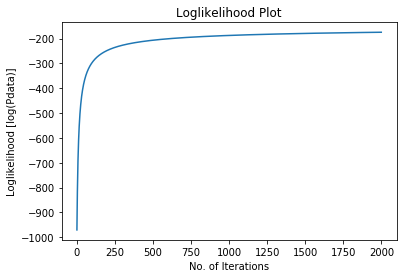

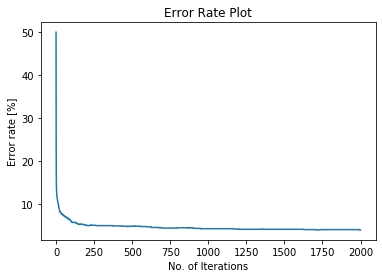

In [35]:
plt.figure(1)
plt.plot(llhood)
plt.xlabel('No. of Iterations')
plt.ylabel('Loglikelihood [log(Pdata)]')
plt.title('Loglikelihood Plot')
plt.savefig('Loglikelihood.png')
plt.figure(2)
plt.plot(erate)
plt.xlabel('No. of Iterations')
plt.ylabel('Error rate [%]')
plt.title('Error Rate Plot')
plt.savefig('error_rate.png')

In [36]:
print(np.reshape(w,(8,-1)))

[[-0.78829559 -1.08978442 -1.04093532 -0.91377207 -0.79768045 -0.44362769
   0.85194951  1.48686387]
 [ 0.13741698  0.02981593  0.10751714 -0.03588487 -0.11677556  0.46711848
  -0.91087728 -1.10890113]
 [ 2.2393945   1.3207593   1.15686483  0.34080243  0.35667478 -1.50558782
  -2.28270332 -2.02959089]
 [ 0.76859539  0.5244599   0.36446257 -0.21202306 -0.53243373 -1.57357102
   0.13693993 -0.07169041]
 [ 0.3856428   0.77742726  0.0357335  -0.20111146 -0.5527803  -0.34695774
  -0.19503798 -0.38856119]
 [ 0.90398187 -0.11591534 -0.23271221  0.07112415  0.17096441 -0.47832063
   0.50989384 -1.02806674]
 [ 1.0742128  -0.3546628   1.01551894  0.43598235  0.27033155 -0.14254485
   0.2692722  -0.78985823]
 [ 0.34352178  0.25309615  0.68522926  1.01661187  0.39471176  0.57245061
   0.22384679 -0.34276892]]


In [37]:
y=[0 for i in range(0,700)]
print('Error rate on Training data of no.3: '+str(error_rate(w,train3dat,y))+'%')
y=[1 for i in range(0,700)]
print('Error rate on Training data of no.5: '+str(error_rate(w,train5dat,y))+'%')
y=[0 if i<=699 else 1 for i in range(0,1400)]
print('Error rate on combined Training data: '+str(error_rate(w,traindata,y))+'%')


Error rate on Training data of no.3: 4.0%
Error rate on Training data of no.5: 4.0%
Error rate on combined Training data: 4.0%


In [38]:
test3dat=convertfile2data('test3_oddYr.txt')
test5dat=convertfile2data('test5_oddYr.txt')
testdata=np.append(test3dat,test5dat,axis=0)

In [39]:
y=[0 for i in range(0,400)]
print('Error rate on Testing data of no.3: '+str(error_rate(w,test3dat,y))+'%')
y=[1 for i in range(0,400)]
print('Error rate on Testing data of no.5: '+str(error_rate(w,test5dat,y))+'%')
y=[0 if i<=399 else 1 for i in range(0,800)]
print('Error rate on combined Testing data: '+str(error_rate(w,testdata,y))+'%')

Error rate on Testing data of no.3: 5.5%
Error rate on Testing data of no.5: 4.5%
Error rate on combined Testing data: 5.0%
